# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [4]:
import pandas as pd
import numpy as np

in_df = pd.read_csv("insurance.csv")
in_df.head()
in_df.shape
in_df.dtypes
in_df.count()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(1338, 7)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [5]:
# Type casting the sex, smoker and region from object to category
in_df['sex'] = in_df.sex.astype('category')
in_df['smoker'] = in_df.smoker.astype('category')
in_df['region'] = in_df.region.astype('category')
in_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [6]:
in_df['region'].value_counts()
in_df['smoker'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
# Replace the string numbers into numerical values for sex
in_df['sex'] = in_df['sex'].replace({'female': 1, 'male': 2})
in_df['region'] = in_df['region'].replace({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4})
in_df['smoker'] = in_df['smoker'].replace({'no': 1, 'yes': 2})

In [8]:
in_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,2,16884.92400
1,18,2,33.770,1,1,1,1725.55230
2,28,2,33.000,3,1,1,4449.46200
3,33,2,22.705,0,1,3,21984.47061
4,32,2,28.880,0,1,3,3866.85520


# Question 2 - Check the distribution of expenses(charges) and state your insights.

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  

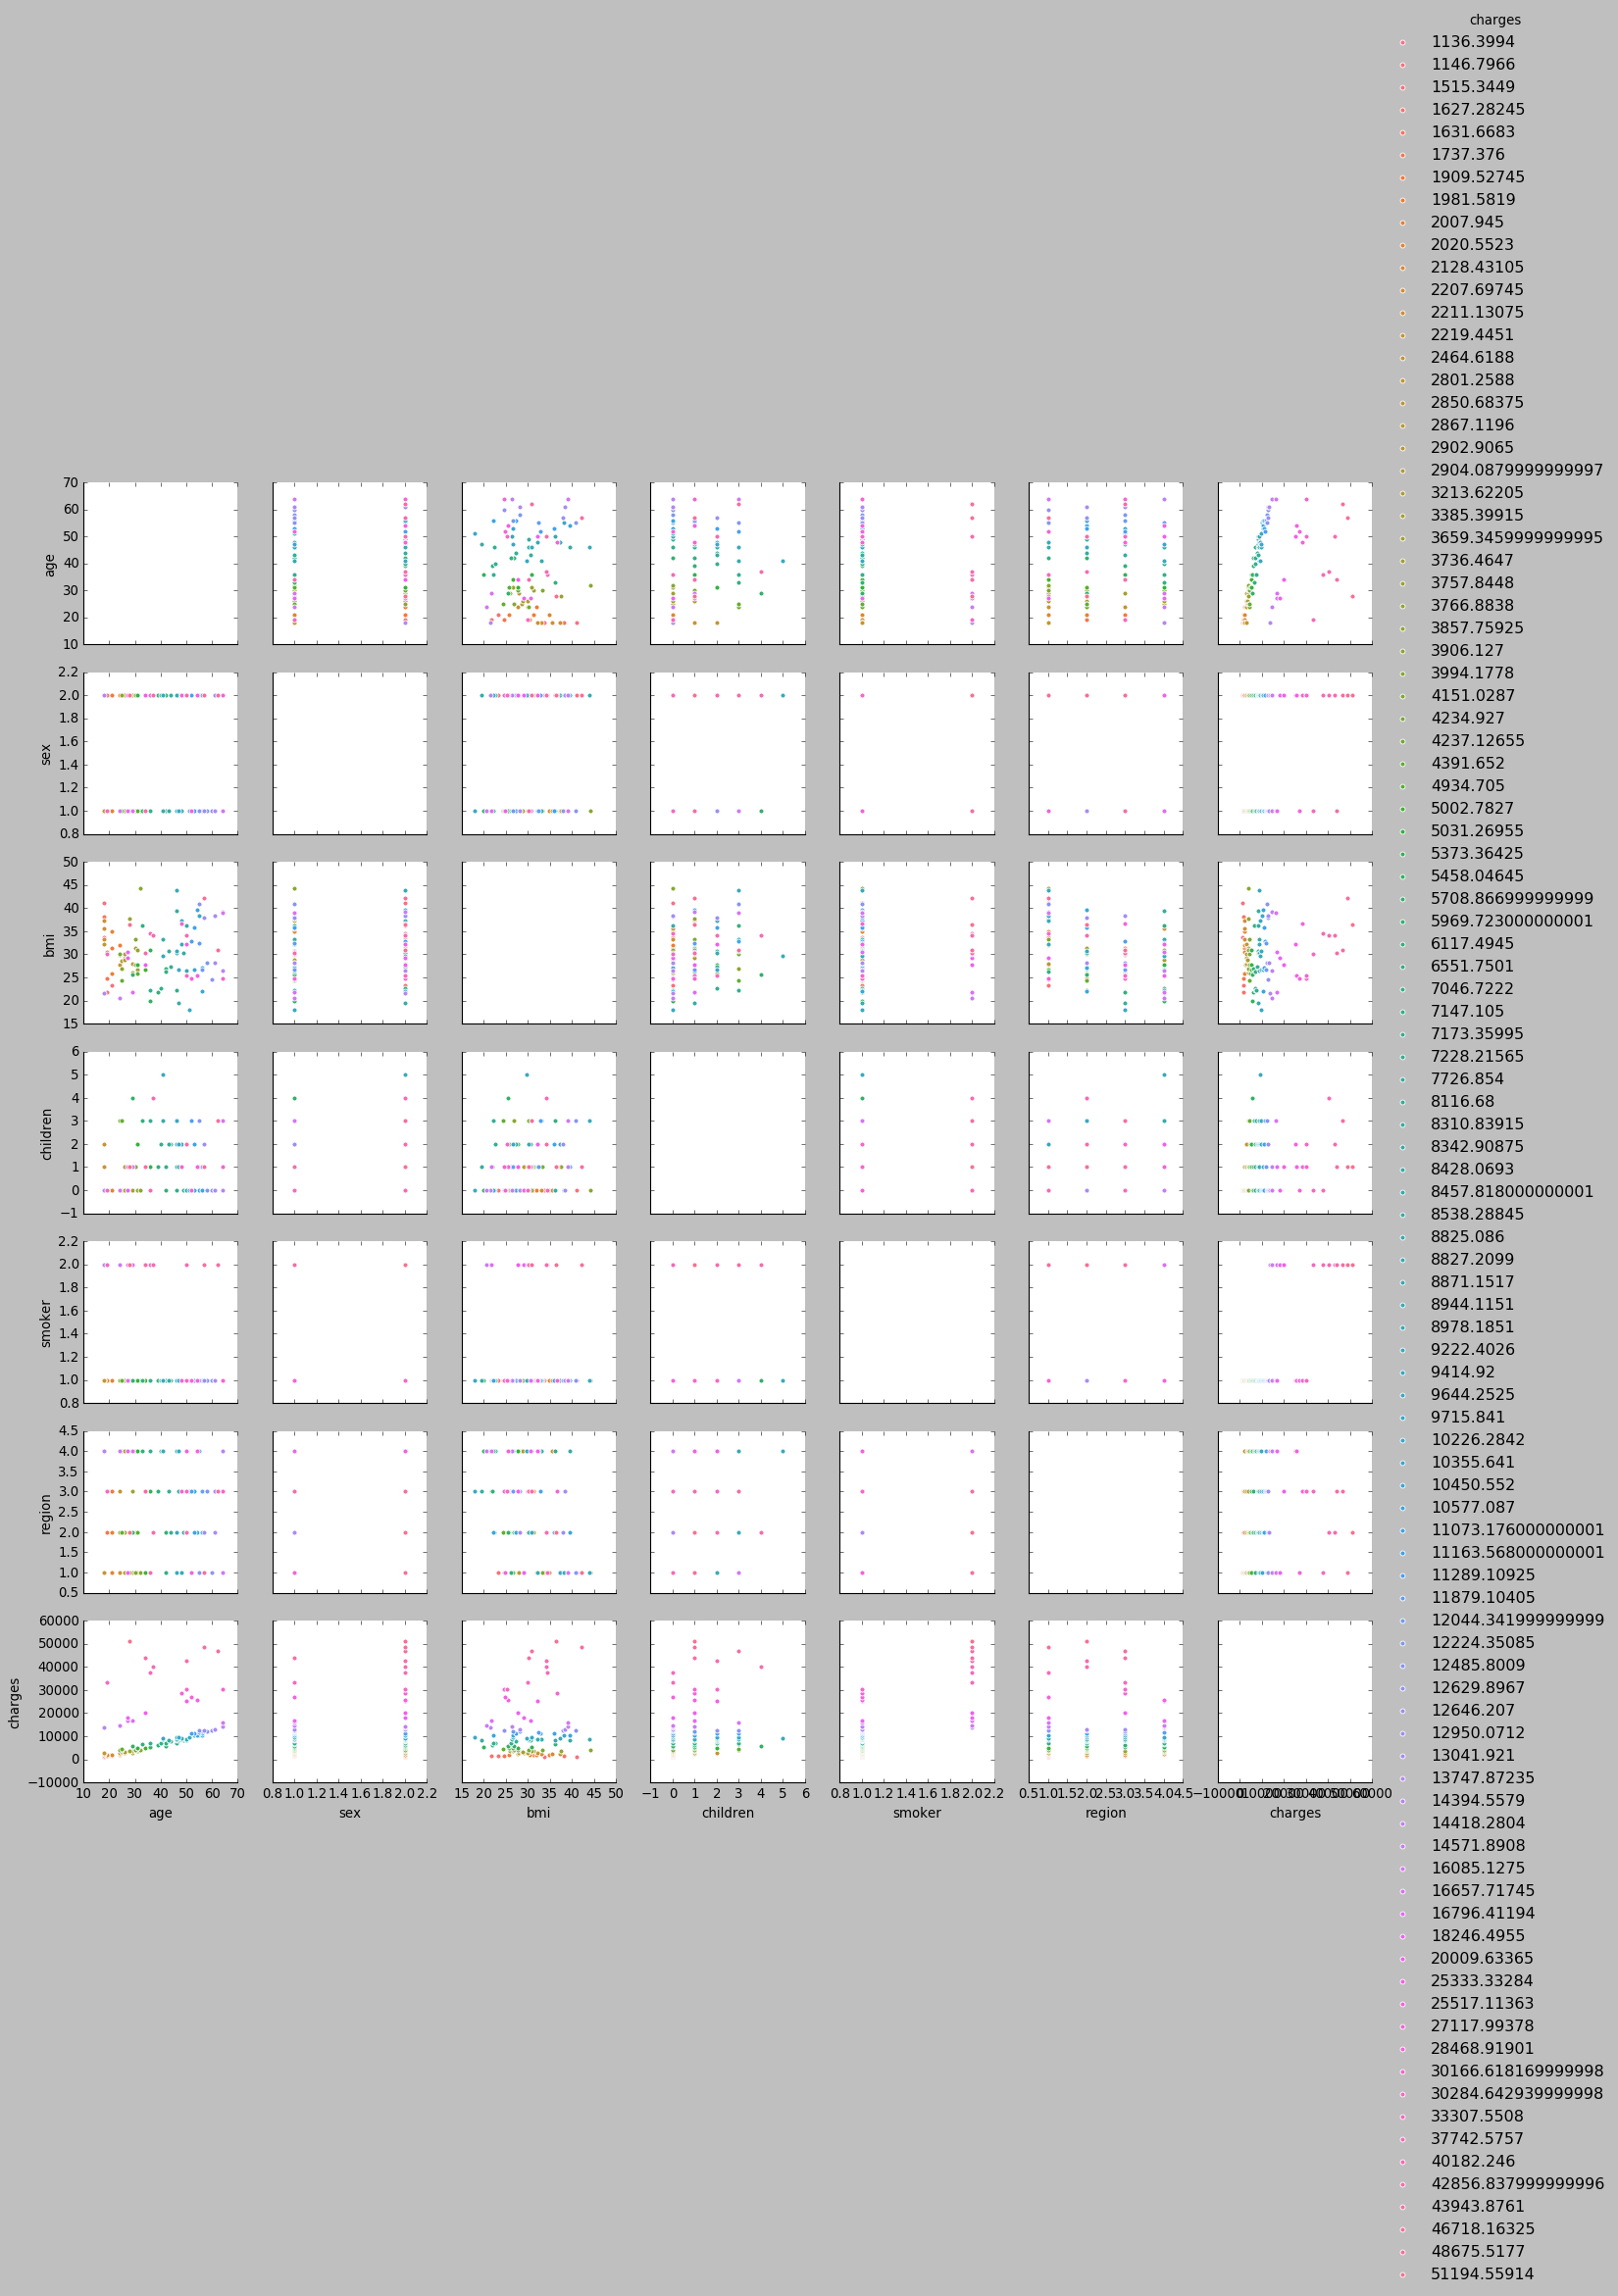

In [10]:
import seaborn as sns
sns.pairplot(in_df.sample(100),diag_kind='kde', hue="charges")

In [ ]:
# Insights:
# Age vs Charges - The data has outliers
# But the data is widely spread. So no need to remove the outliers.

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [122]:
# Correlation martix
in_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [74]:
in_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,1.505232,0.500160,1.0000,1.00000,2.000,2.000000,2.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,1.204783,0.403694,1.0000,1.00000,1.000,1.000000,2.00000
region,1338.0,2.455157,1.130197,1.0000,1.00000,2.000,3.000000,4.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [111]:
from scipy.stats import zscore

in_df_scaled  = in_df.apply(zscore)

in_df_scaled = pd.DataFrame(in_df_scaled, columns=in_df.columns)
in_df_scaled

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-0.402874,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-1.288007,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-1.288007,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,0.482258,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,0.482258,-0.776802
5,-0.584350,-1.010519,-0.807656,-0.908614,-0.507463,-1.288007,-0.785908
6,0.483668,-1.010519,0.455486,-0.078767,-0.507463,-1.288007,-0.415500
7,-0.157143,-1.010519,-0.479567,1.580926,-0.507463,0.482258,-0.494728
8,-0.157143,0.989591,-0.136714,0.751079,-0.507463,1.367391,-0.567017
9,1.480485,-1.010519,-0.791252,-0.908614,-0.507463,0.482258,1.293027


In [112]:
# Create a separate dataframe consisting only of the features i.e independent attributes

#in_feature_df = in_df.drop(labels= "charges" , axis = 1)
#in_feature_df.head()
X = in_df_scaled.drop("charges", axis=1)
Y = in_df_scaled[['charges']]
X.shape
Y.shape

(1338, 6)

(1338, 1)

In [113]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("Y_train ", Y_train.shape)
print("Y_test ", Y_test.shape)

X_train  (936, 6)
X_test  (402, 6)
Y_train  (936, 1)
Y_test  (402, 1)


# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [167]:
pd.get_dummies(X_train)

,age,sex,bmi,children,smoker,region
744,0.768473,0.989591,-0.697746,-0.908614,-0.507463,0.482258
363,-1.296362,-1.010519,-0.699387,-0.078767,-0.507463,-0.402874
10,-1.011557,0.989591,-0.728915,-0.908614,-0.507463,1.367391
970,0.768473,-1.010519,-0.410668,1.580926,-0.507463,-1.288007
634,0.839674,0.989591,1.482405,-0.078767,-0.507463,-0.402874
554,-1.011557,-1.010519,1.748977,-0.908614,-0.507463,1.367391
314,-0.869155,-1.010519,0.120836,-0.908614,1.970587,-0.402874
419,1.694088,-1.010519,-0.604241,-0.908614,1.970587,0.482258
525,-1.509965,-1.010519,0.527666,-0.908614,-0.507463,-1.288007
1041,-1.509965,0.989591,-1.243194,-0.908614,-0.507463,1.367391


In [168]:
pd.get_dummies(y_train)

,1121.8739,1135.9407,1137.011,1146.7966,1163.4627,1241.565,1242.26,1242.816,1256.299,1261.442,...,48549.17835,48673.5588,48675.5177,48824.45,48885.135610000005,48970.2476,52590.82939,55135.402089999996,62592.87309,63770.42801
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Question 6 - Train your model.

In [114]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
X_train.head()
X_train.columns

,age,sex,bmi,children,smoker,region
744,0.768473,0.989591,-0.697746,-0.908614,-0.507463,0.482258
363,-1.296362,-1.010519,-0.699387,-0.078767,-0.507463,-0.402874
10,-1.011557,0.989591,-0.728915,-0.908614,-0.507463,1.367391
970,0.768473,-1.010519,-0.410668,1.580926,-0.507463,-1.288007
634,0.839674,0.989591,1.482405,-0.078767,-0.507463,-0.402874


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [117]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for age is 0.29181067219519385
The coefficient for sex is -0.011713887043945118
The coefficient for bmi is 0.16291073399688275
The coefficient for children is 0.034011515770973895
The coefficient for smoker is 0.8022389811198672
The coefficient for region is 0.031555137138503705


# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [118]:
y_pred = regression_model.predict(X_test)
y_pred

array([[-7.19072678e-01],
       [-3.61677056e-02],
       [-4.28454380e-02],
       [-1.41164925e-02],
       [-1.03079083e+00],
       [ 1.57244958e+00],
       [-4.22522318e-02],
       [-8.42894010e-02],
       [-7.78807822e-01],
       [ 1.36647866e+00],
       [-1.93607304e-01],
       [ 3.58592778e-01],
       [-3.88191120e-01],
       [-3.91984303e-01],
       [-8.25107976e-01],
       [-2.30455892e-01],
       [-7.70934018e-01],
       [-5.15718489e-01],
       [ 1.34267800e-01],
       [ 1.07580052e-01],
       [-6.64244823e-02],
       [ 1.64377707e+00],
       [-3.42842093e-01],
       [-3.41558615e-01],
       [-8.33204152e-01],
       [-4.24161286e-01],
       [-3.26154811e-01],
       [-2.07757971e-01],
       [-4.46529405e-01],
       [-7.31709046e-01],
       [ 8.06247630e-02],
       [-6.06856374e-01],
       [ 1.76609313e+00],
       [ 1.17243958e+00],
       [ 1.66500307e+00],
       [-3.12228434e-01],
       [ 1.46338821e+00],
       [ 1.13273393e+00],
       [ 1.5

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
# The mean absolute error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error: %.4f" % mae)
# The mean squared error
mse = mean_squared_error(Y_test, y_pred)
print("Mean squared error: %.4f" % mse)
print("Root mean square error: %.4f" % math.sqrt(mse))
# Explained variance score: 1 is perfect prediction
print('R Square score: %.2f' % r2_score(Y_test, y_pred))


Mean absolute error: 0.3420
Mean squared error: 0.2510
Root mean square error: 0.5010
R Square score: 0.74


In [121]:
regression_model.score(X_train, Y_train)
regression_model.score(X_test, Y_test)

0.754483808684739

0.7404858549911036

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [135]:
# read the data
from sklearn import datasets
iris_df = pd.read_csv("Iris.csv")
iris_df.head()
iris_df.shape

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)

In [145]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()
iris
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['Species'])


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [146]:
iris_df.shape
iris_df.head()

(150, 5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [147]:
X = iris_df.drop("Species", axis=1)
Y = iris_df[['Species']]
X.shape
Y.shape

(150, 4)

(150, 1)

## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: Runtim

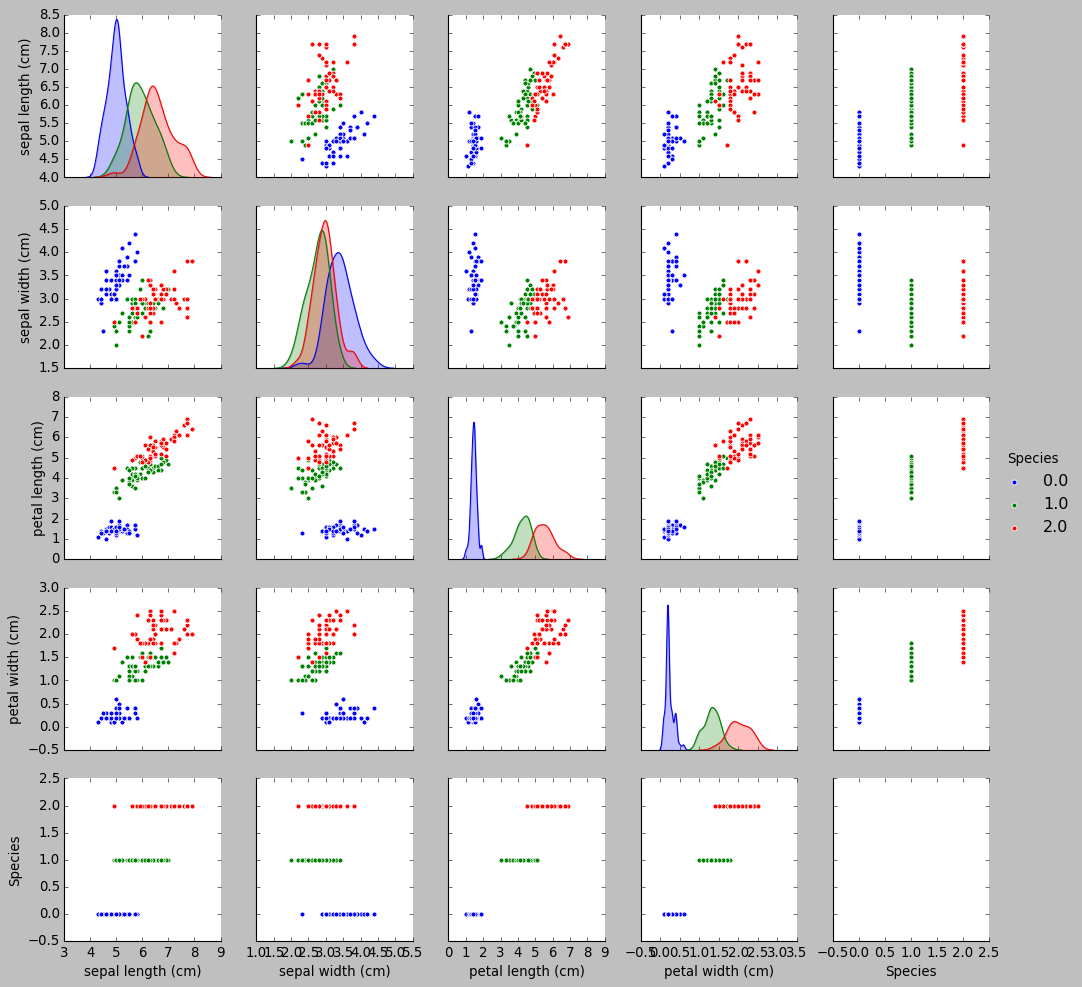

In [149]:
sns.pairplot(iris_df, hue="Species")

## Question 11- Do Feature Scaling 

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
  
# To scale data 
scaler.fit(iris_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

## Question 12- Train and Fit NaiveBayes Model

In [160]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=1)

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model_gnb = GaussianNB()
model_gnb.fit(train_set, train_labels)

model_gnb.score(train_set , train_labels)      # performance on test data

test_pred = model_gnb.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))


C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

0.9523809523809523

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        14
        1.0       0.94      0.89      0.91        18
        2.0       0.86      0.92      0.89        13

avg / total       0.94      0.93      0.93        45



## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [162]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y_predict_gnb = model_gnb.predict(test_set)
gnb_acc=metrics.accuracy_score(test_labels,y_predict_gnb)
print("Naive Bayes Accuracy is: ", gnb_acc)
print(metrics.confusion_matrix(test_labels, test_pred))
scores = cross_val_score(model_gnb, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Naive Bayes Accuracy is:  0.9333333333333333
[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
Cross-validated scores: [1.         1.         0.90909091 1.         0.90909091 0.90909091
 1.         0.88888889 0.88888889 0.88888889] [1.         1.         0.90909091 1.         0.90909091 0.90909091
 1.         0.88888889 0.88888889 0.88888889]
Average score: 0.9393939393939394


C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.p

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [164]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )
Rf_model.fit(train_set, train_labels)

y_predict_Rf=Rf_model.predict(test_set)
Rf_acc=metrics.accuracy_score(test_labels,y_predict_Rf)
print("Random Forest Model Accuracy: ", Rf_acc)



C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Random Forest Model Accuracy:  0.9555555555555556


## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(train_set, train_labels)

y_pred_gbcl = gbcl.predict(test_set)

gbcl_acc=metrics.accuracy_score(test_labels, y_pred_gbcl)
print("GradientBoost Classifier Accuracy: ", gbcl_acc)

C:\Users\varuraje.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

GradientBoost Classifier Accuracy:  0.9555555555555556
